In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/w_/tjwdv_r54t97vcw86ytd47k00000gn/T/ipykernel_1362/151225506.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
data = pd.read_excel('Adidas US Sales Datasets.xlsx', header=4)


In [4]:
data.head(5)

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
#Retailer: Names such as Foot Locker, Walmart, Sports Direct, and West Gear.

#Retailer ID: A unique identifier for each retailer.

#Invoice Date: The date the invoice was generated.

#Region: Geographic areas like West, Northeast, Southeast, South, and Mid-west.

#Product: Categories like Men’s and Women’s Street and Athletic Footwear, and Apparel.

#Price per Unit: The cost of a single item of a specific product.

#Units Sold: The quantity of a product sold in a specific timeframe.

#Total Sales: The total revenue from sales over a certain period. -- seems good for target variable!

#Operating Profit: A measure of the profitability from the main business operations.

#Operating Margin: A ratio indicating the profitability of the business operations.

#Sales Method: The channels through which sales were made, including In-store, Outlet, and Online.

# 1.1 Describe 

In [5]:
profile = ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 1.2 Null Values Treatment

In [6]:
data.isnull().sum()

Unnamed: 0          9648
Retailer               0
Retailer ID            0
Invoice Date           0
Region                 0
State                  0
City                   0
Product                0
Price per Unit         0
Units Sold             0
Total Sales            0
Operating Profit       0
Operating Margin       0
Sales Method           0
dtype: int64

# 1.3 Removing Irrelevant Features

In [7]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

# 1.4 Correction of data Types, if needed!

In [8]:
data.dtypes
# Nothing as of now

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

# 1.5 Removing Duplicates 

In [9]:
# find out, the duplicated values sum
data.duplicated().sum()

data.drop_duplicates(inplace=True)

# 2. Relation Mapping and Analysis

# 2.1 Univariate Analysis

# 2.1.1 Categorical Variables

In [10]:
categorical_features = data.select_dtypes(include='object')

In [14]:
def Univariate_Analysis_for_Categorical_features():

    for feature in categorical_features:
        i = 221
        plt.figure(1)
        plt.subplot(i)
        data[feature].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
        plt.title(f'Countplot for {feature}')
        plt.show()
        i += 1
    
#df_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
#sns.countplot(x=feature, data=data, palette='viridis') -- not good for displaying more than 3 features --
## so opted for bar plot heree!!

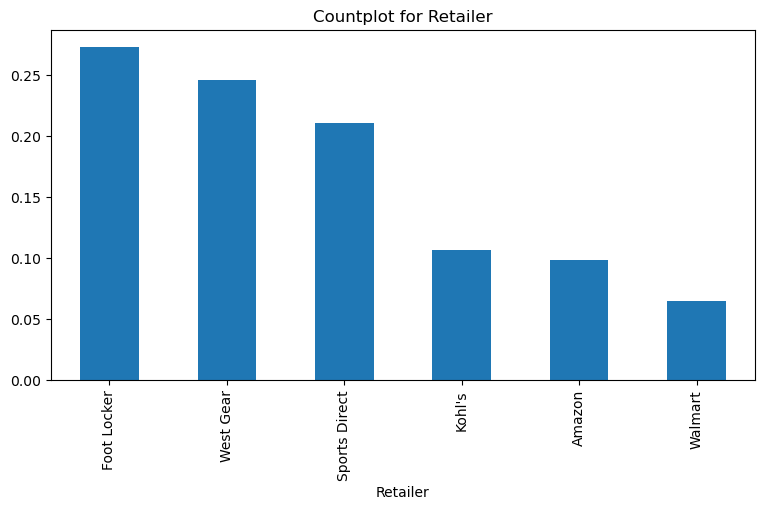

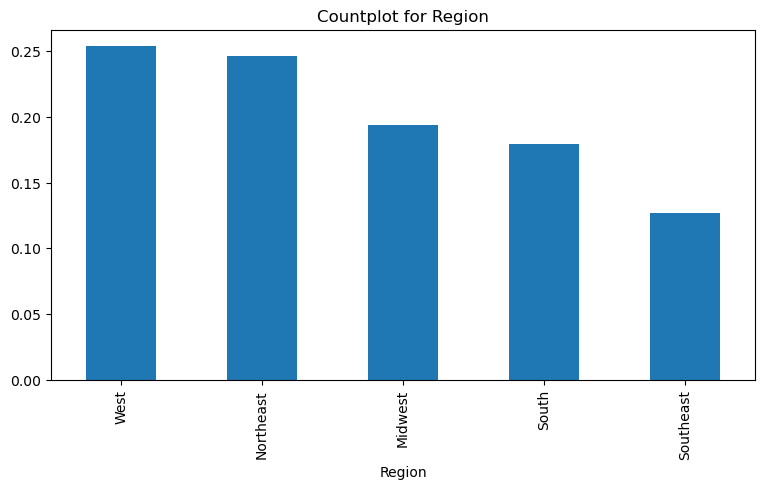

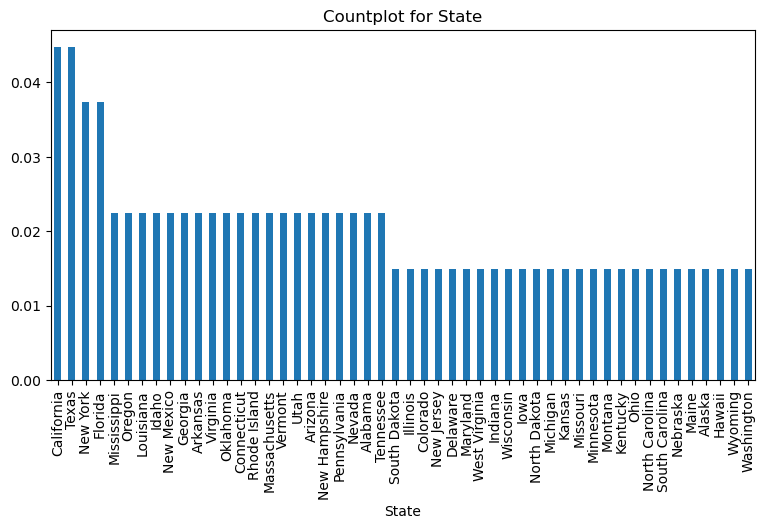

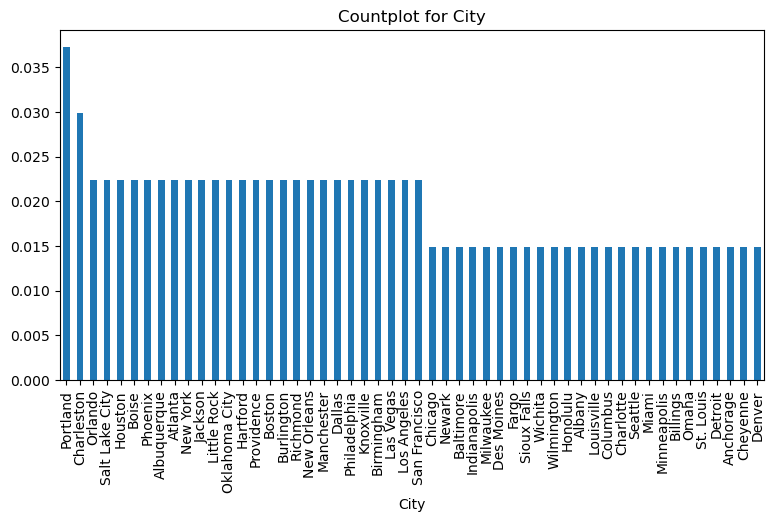

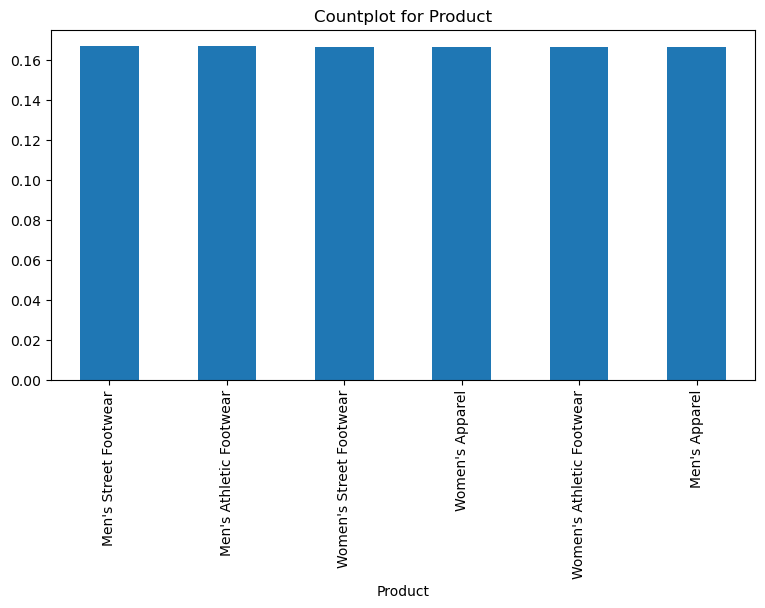

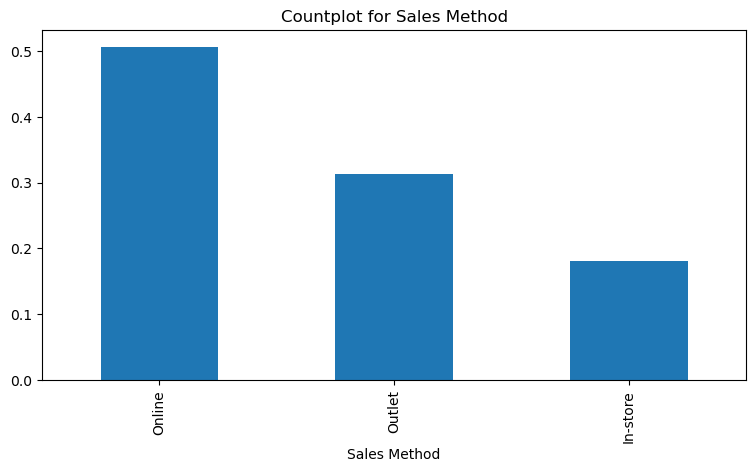

In [15]:
Univariate_Analysis_for_Categorical_features()

# Understanding and Observations

In [16]:
# best retailer for addidas products for mentione period -- foot Locker
# worst retailer for addidas products for mentioned period -- walmart
# best sales region  -- West
# worst sales region (needs some work) -- Southeast
# best sales state -- California
# best sale city -- portland
# best product -- almost all are equally sold --
# online has been the best platform to buy addidas products -- with in store being performed the worst

# 2.2.1 Numerical Variables 

In [17]:
numerical_features = data.select_dtypes(exclude='object')

data_and_id_fields = 'Retailer ID', 'Invoice Date'

numerical_features = [feature for feature in numerical_features if feature not in data_and_id_fields]


In [18]:
def Univariate_Analysis_for_Numerical_features():

    for feature in numerical_features:
        i = 221
        plt.figure(1)
        plt.subplot(131)
        data[feature].plot.hist(figsize=(16,5))
        plt.subplot(132)
        data[feature].plot.box(figsize=(16,5))
        plt.show()
        i += 1

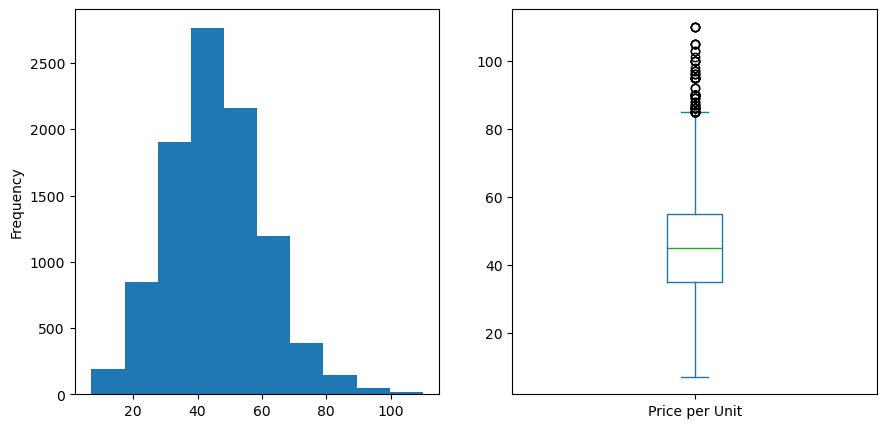

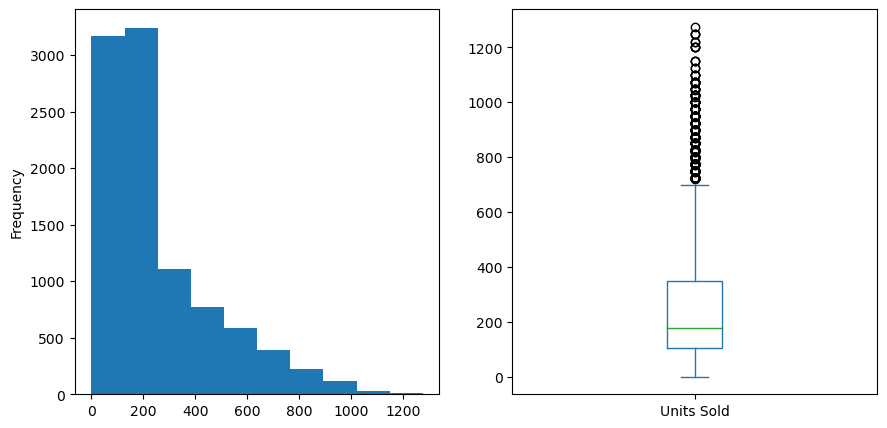

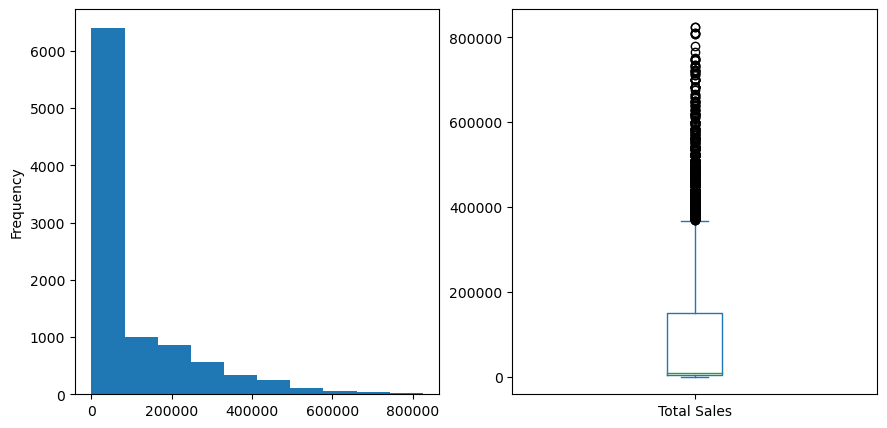

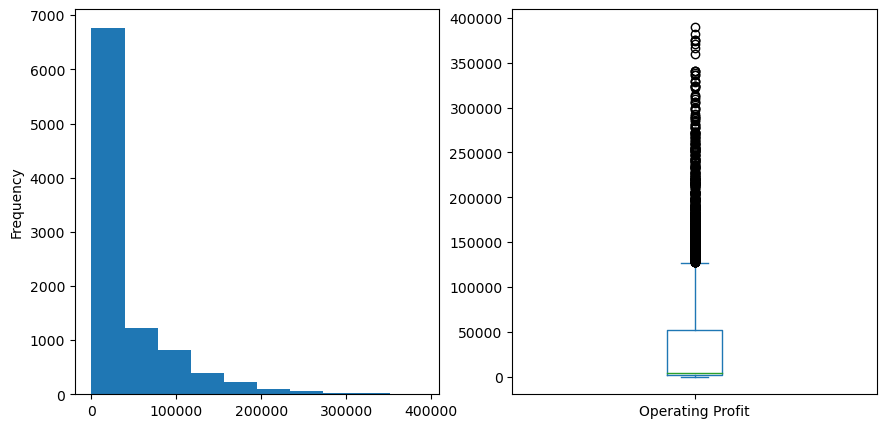

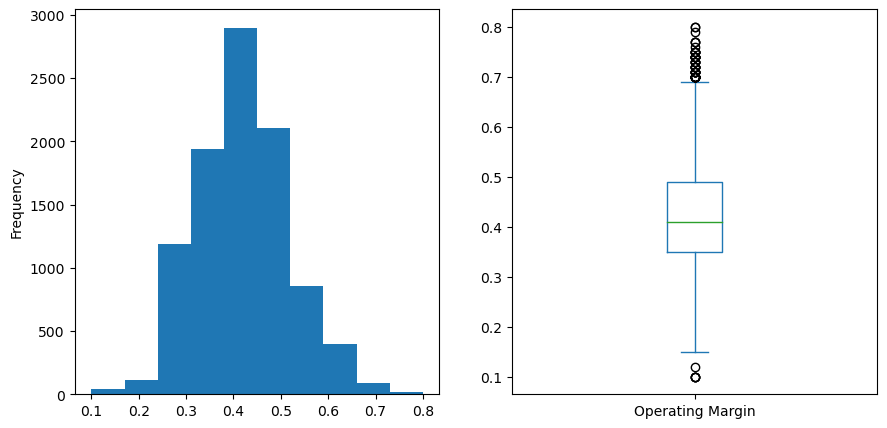

In [19]:
Univariate_Analysis_for_Numerical_features()

# Understanding and Observations

In [ ]:
# We can see that, there are lot of outliers present in all the columns


# Sales Analysis -- Overall Sales Value

In [ ]:
total_revenue = data['Total Sales'].sum()
total_revenue

# Solve Some questions

In [ ]:
## 1. Sales Performance Analysis : Which products are excelling in sales, and which are underperforming ?

product_sales = data.groupby('Product').agg({'Total Sales': 'sum', 'Units Sold': 'sum'}).reset_index()

top_performing_products = product_sales.sort_values(by='Total Sales', ascending=False)

top_performing_products.head()

In [ ]:
# Underperforming Products

under_performing_products = product_sales.sort_values(by='Total Sales', ascending=True)
under_performing_products.head()

In [ ]:
## 2. Regional Market Analysis : Which stores are experiencing strong sales, and which ones are lagging ?

region_and_city_grouping = data.groupby(['City', 'Retailer'])['Units Sold'].sum().reset_index()

three_columns_sorted = region_and_city_grouping.sort_values(by=['City', 'Units Sold'], ascending=[True, False])

top_performers = three_columns_sorted.groupby('City').head(1)
top_performers.head()



In [ ]:
worst_performers = three_columns_sorted.groupby('City').tail(1)
worst_performers.head()

In [ ]:
# 3. Profit Margin Analysis : Does the operating profit significantly impact sales ?

data['Operating Profit'].corr(data['Total Sales'])

In [ ]:
data['Operating Profit'].corr(data['Units Sold'])

In [ ]:
# can do heatmap analysis only if, all the categorical columns are converted into numerical colums

plt.figure(figsize=(7,7))
sns.heatmap(data.corr() > 0.7, annot = True, cbar = False)
plt.show()

In [ ]:
# 4. Effeciency of sales methods : which sales method is more effective - In store or online ?

# show the instore - sales and operating profit and margin

data.groupby(['Sales Method'])[['Operating Profit', 'Operating Margin']].sum().reset_index()

In [ ]:
# 5. Price Optimizations -- Is there a specific price range that achieves better sales than others ?



# Digging more deep into Date

In [ ]:
# sales per month
    # highest sales happened during which month ?
# sales during week
    # highest sales happened during which week ?
# sales during day
    # highest sales happened during day / night ?
# highest selling hour 
    # hour wise


# 2.3 Bivariate Analysis

# 3.1 More Details into Outliers 

# 3.2 Checking Outliers

# 4.1 Encoding Categorical variables

In [ ]:
# Predicting price per unit --- 
    ## there are 6 products ---
    ## regions to consider
    ## state, city also can be put into consideration
    ## 
    
# Predicting the total sales of addidas products
    ## region
    ## city
    ## product
    

In [ ]:
data.head()